<a href="https://colab.research.google.com/github/vinceriot/ML_lab/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%98%D1%82%D0%BE%D0%B3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация (Пример 1)

Голдобин Денис ФИТ-2

Датасет - https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


Подключение библиотек и Google диска

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import scipy.stats as stats
from google.colab import drive
from sklearn.metrics import recall_score, precision_score


drive.mount('/content/drive/')

Mounted at /content/drive/


# Загрузка данных



чтение датасета

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/datapy/data.csv', delimiter=';')

# Проверка структуры и основной информации о данных

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Количество целевых переменных по категориям

In [ ]:
print(dataset['Target'].unique())
print(dataset['Target'].value_counts())

['Dropout' 'Graduate' 'Enrolled']
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


# Визуализация датасета

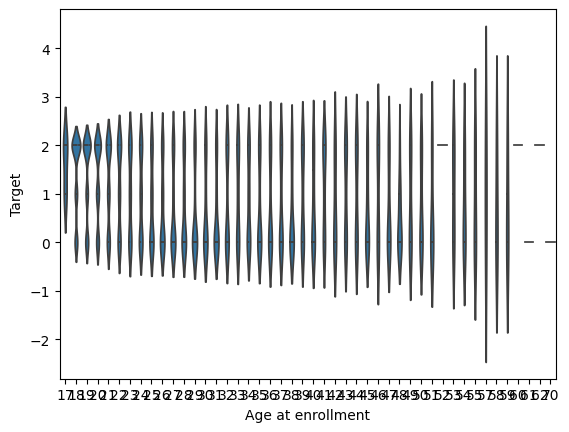

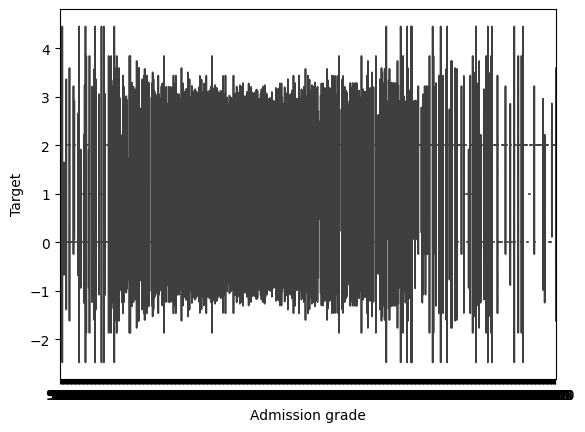

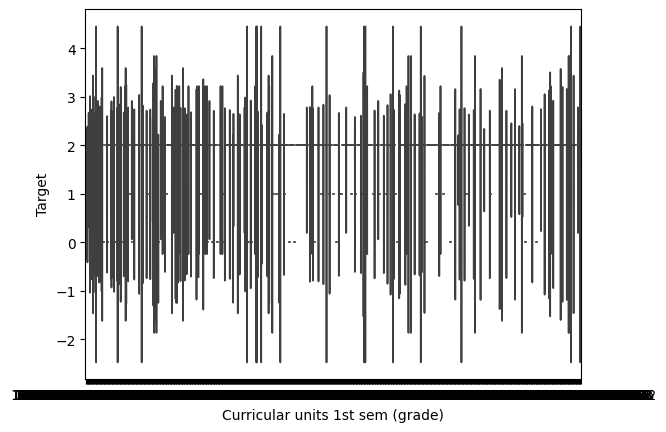

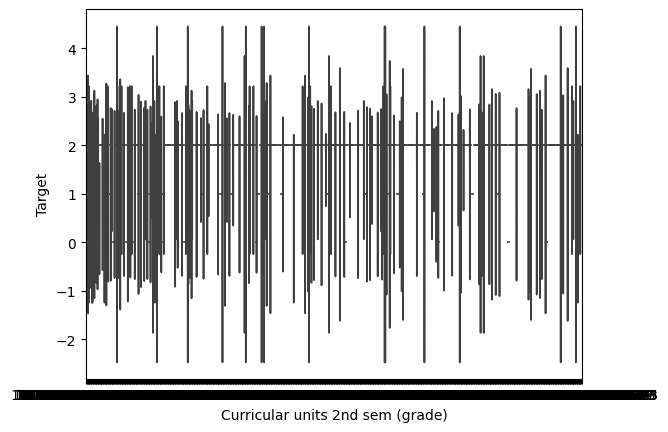

In [ ]:
# Скрипичный график для признака "Возраст при поступлении"
sns.violinplot(y='Target', x='Age at enrollment', data=df, inner='quartile')
plt.show()

# Скрипичный график для признака "Оценка при поступлении"
sns.violinplot(y='Target', x='Admission grade', data=df, inner='quartile')
plt.show()

# Скрипичный график для признака "Оценка за 1 семестр"
sns.violinplot(y='Target', x='Curricular units 1st sem (grade)', data=df, inner='quartile')
plt.show()

# Скрипичный график для признака "Оценка за 2 семестр"
sns.violinplot(y='Target', x='Curricular units 2nd sem (grade)', data=df, inner='quartile')
plt.show()


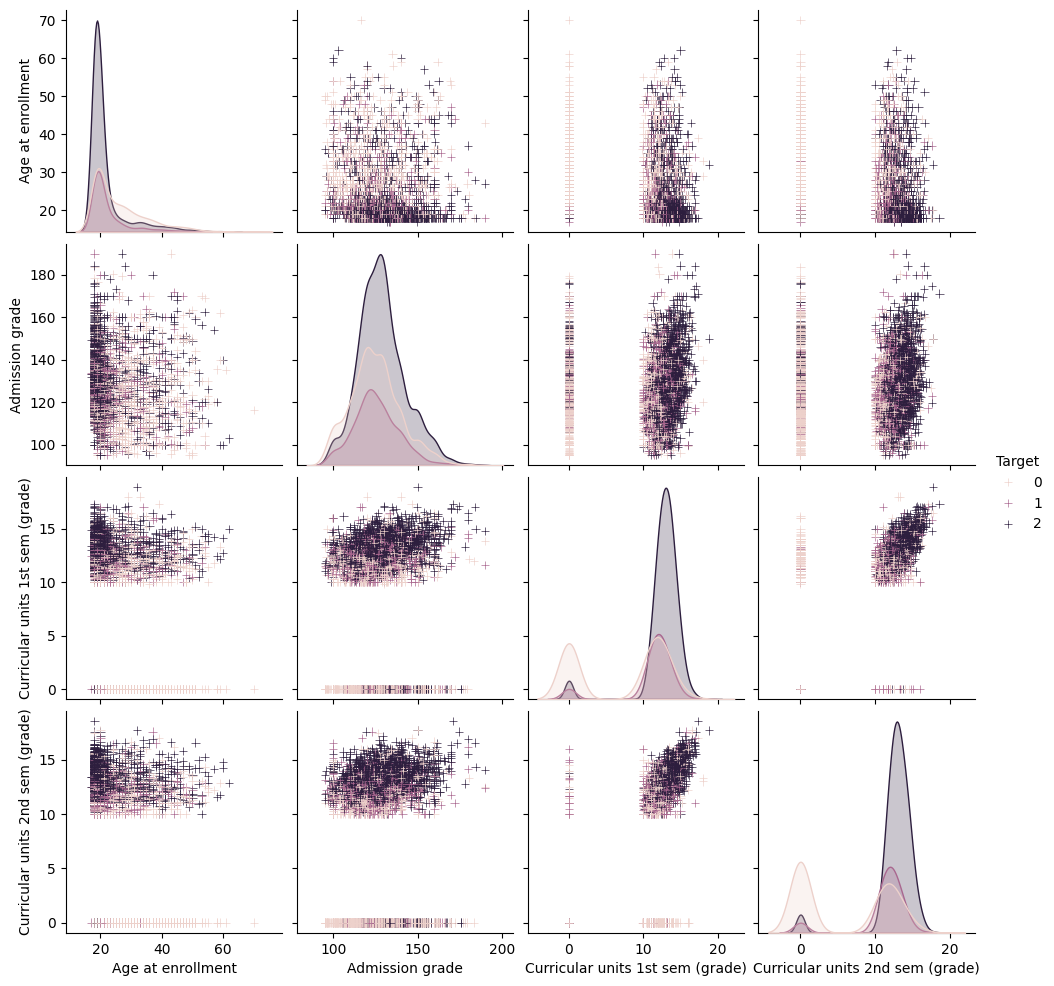

In [ ]:
# Парный график для сравнения ключевых признаков
sns.pairplot(df[['Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']],
             hue='Target', markers='+')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


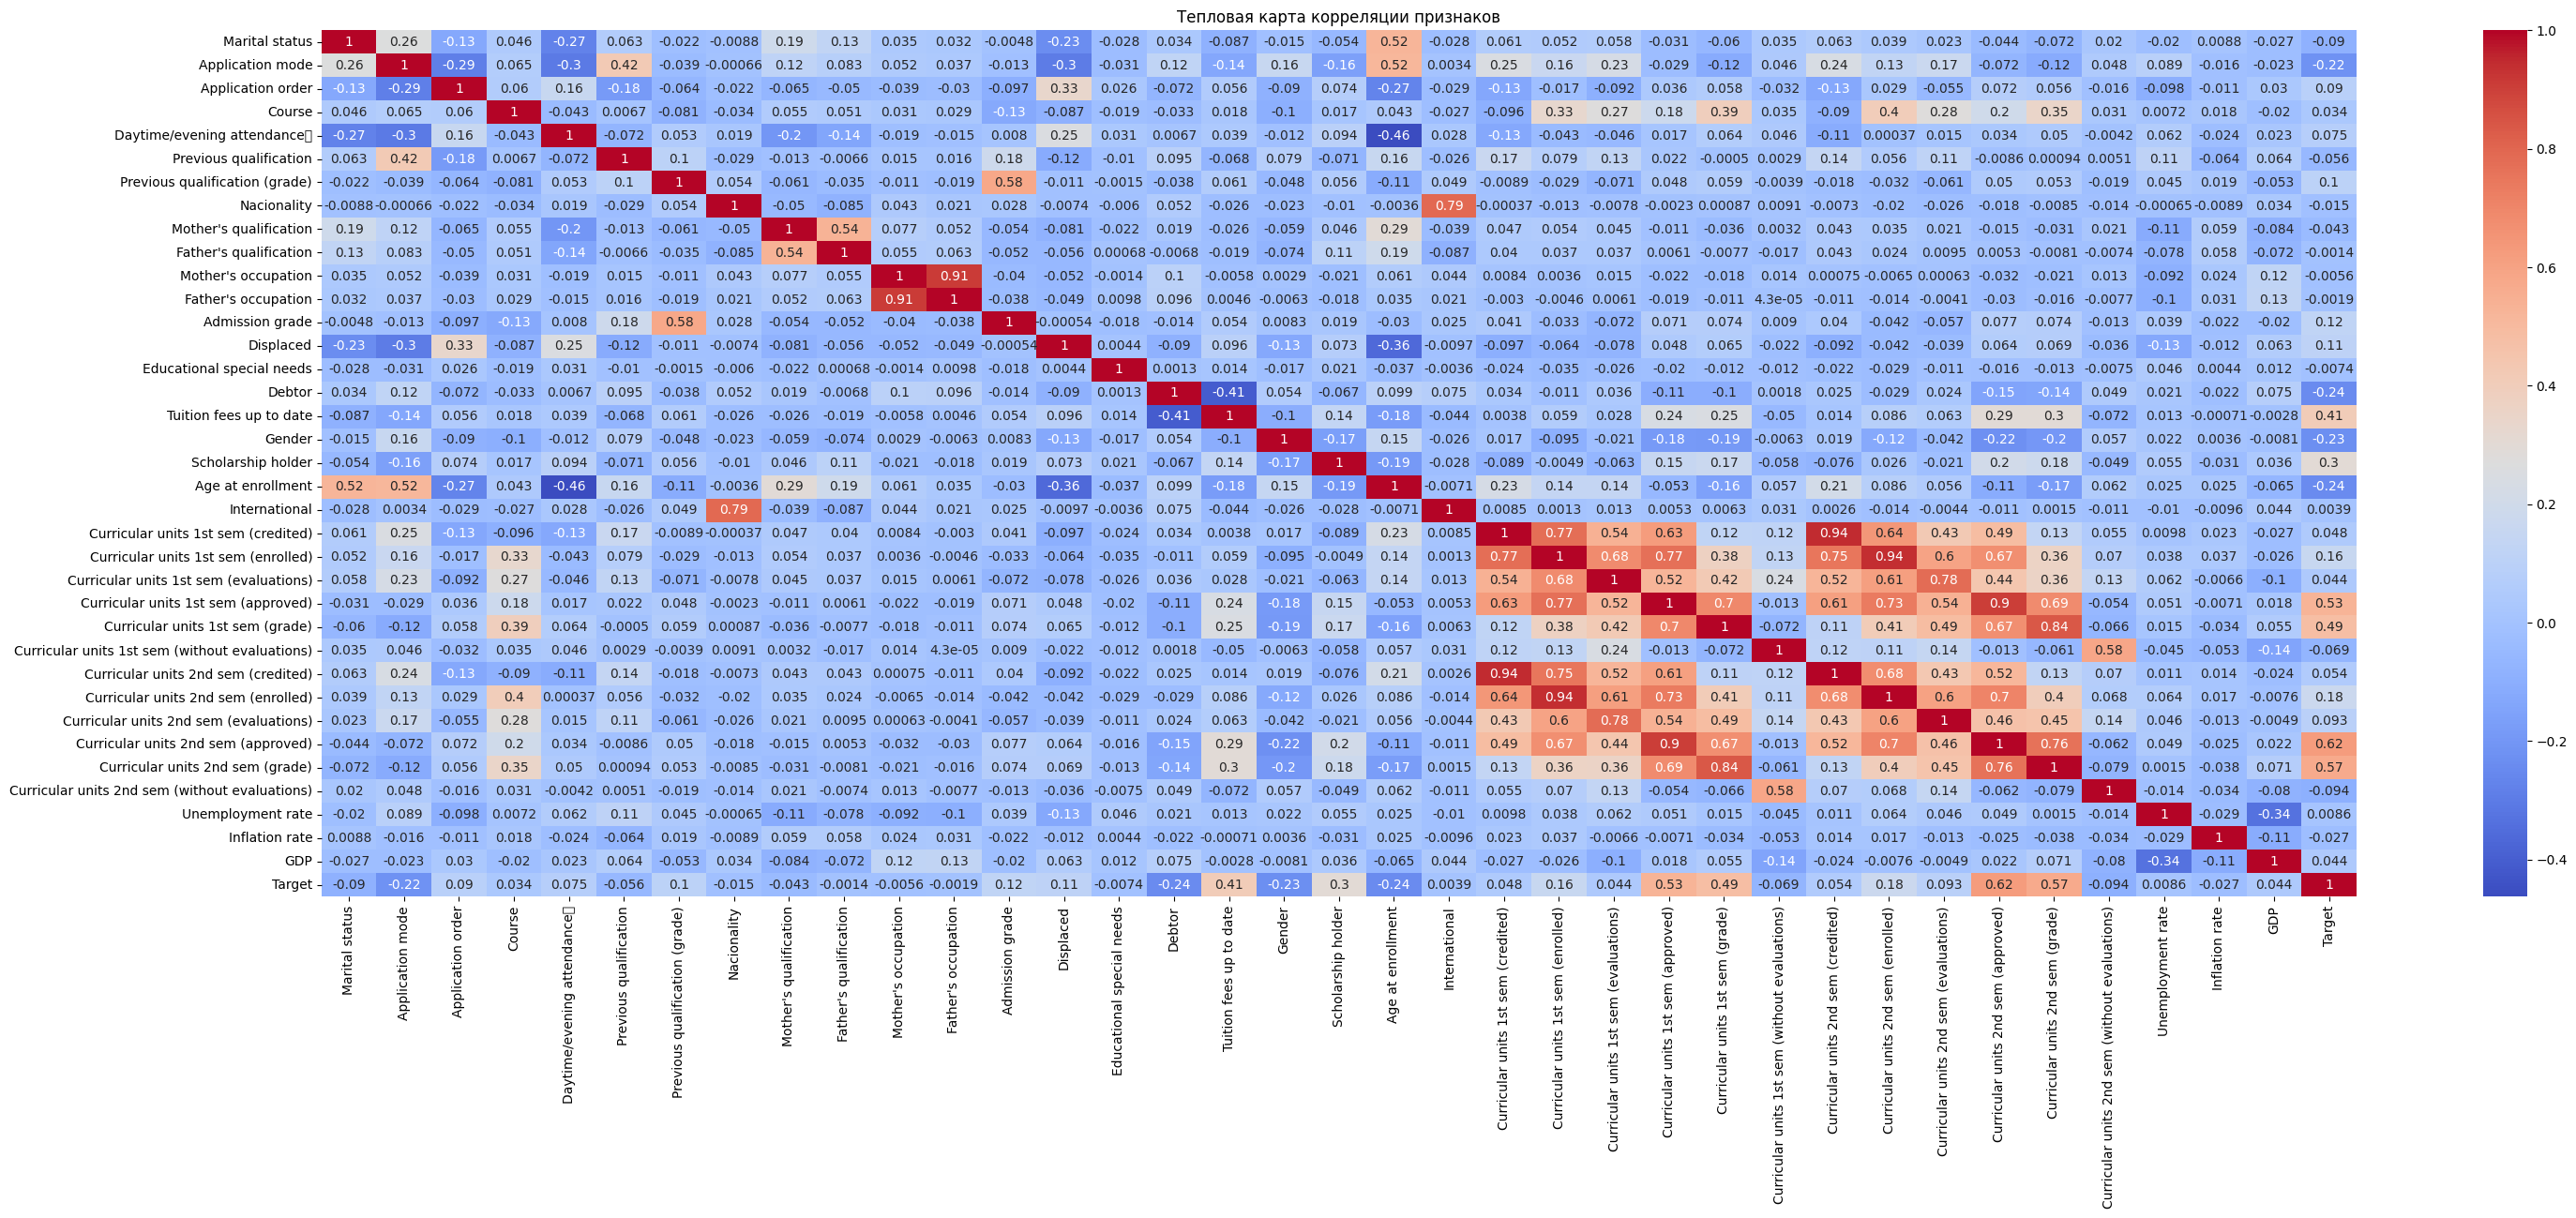

In [ ]:
# Построение тепловой карты для числовых признаков
plt.figure(figsize=(35,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков')
plt.show()

# Преобразование категориальных данных

In [ ]:
df = dataset.copy()
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate' : 2})

Проверка преобразования

In [ ]:
df['Target']

,Target
0,0
1,2
2,0
3,2
4,2
...,...
4419,2
4420,0
4421,0
4422,2


# Построение модели

Разделение набора данных



In [ ]:
# Подготовка данных
X = df.drop(['Target'], axis=1)
y = df['Target']

In [ ]:
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (4424, 36) | y shape: (4424,) 


In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

Обучение и выбор оптимальной модели

In [ ]:

# Определение моделей
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=2000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

In [ ]:
# Оценка моделей
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.745968 (0.016956)
LDA: 0.760377 (0.016962)
KNN: 0.591125 (0.019121)
CART: 0.680707 (0.017940)
NB: 0.684661 (0.021682)
SVC: 0.502121 (0.003423)


LinearDiscriminantAnalysis показал лучшие метрики среди всех алгоритмов.

В дальнейшем для работы используется LDA

In [ ]:
# Linear Discriminant Analysis (LDA) - Визуализация решений
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X_train, y_train)
lda_pred_res = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_pred_res)

print(f'Точность LDA: {lda_accuracy}')
print(f'Предсказания LDA: {lda_pred_res}')

Точность LDA: 0.7672316384180791
Предсказания LDA: [2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 0 2 1 2 2 2 2 1 0
 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 0 0 2 2 2 2 0 0 2 2 2 0 2 0 2
 2 2 2 2 2 1 2 0 2 2 0 2 0 2 1 1 2 1 1 2 2 2 2 2 0 1 2 1 2 0 2 2 0 1 0 0 0
 2 2 2 0 1 2 2 2 2 1 1 2 2 2 2 1 2 0 2 2 2 2 2 1 0 1 0 0 2 2 2 2 0 2 2 2 2
 2 2 0 1 1 2 2 0 2 2 2 1 2 2 1 1 2 2 2 2 2 1 0 1 0 1 2 0 2 2 2 1 2 2 1 2 2
 0 1 0 0 0 0 2 2 0 0 2 2 1 1 2 0 2 2 2 0 1 2 2 1 2 0 2 2 1 2 2 2 2 2 2 0 0
 2 0 2 0 2 1 2 2 2 2 0 0 2 1 2 0 2 2 2 2 2 2 2 2 1 2 0 0 0 0 2 0 2 2 2 2 2
 0 2 1 0 1 0 0 2 1 2 2 0 1 2 2 1 2 0 0 0 2 2 0 2 2 2 1 1 0 2 2 1 2 1 2 2 1
 0 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 1 0 0 2 2 2 0 0
 0 0 0 2 2 1 2 0 2 0 2 1 2 2 0 2 1 0 2 2 2 2 2 2 0 2 2 1 1 0 2 2 2 2 1 1 2
 2 2 2 0 0 2 2 2 2 0 2 2 2 2 0 2 0 1 2 0 2 2 1 0 2 0 2 1 2 2 2 2 2 0 2 2 2
 2 2 1 2 0 2 1 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 1 2 0 2 2 2 2 2 2 0 2 0
 2 1 2 0 0 0 2 0 2 0 2 2 2 2 2 2 2 0 2 0 0 2 0 2 

## Визуализация решения

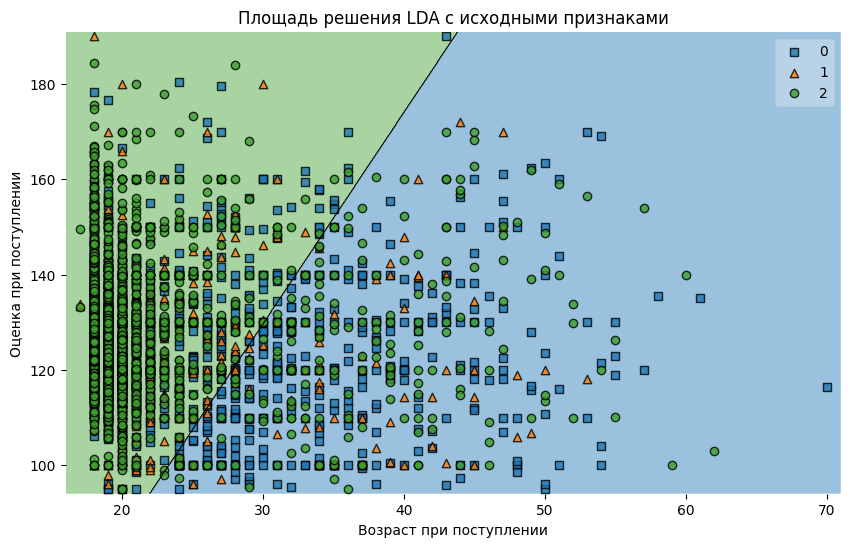

In [ ]:
# Визуализация решений LDA на двумерном пространстве
plt.figure(figsize=(10, 6))
X_2d = X_train[['Age at enrollment', 'Admission grade']].values
y_2d = y_train.values
lda1 = LinearDiscriminantAnalysis(solver='eigen')
lda1.fit(X_2d, y_2d)

plt.title('Площадь решения LDA с исходными признаками')
plot_decision_regions(X=X_2d, y=y_2d, clf=lda1)
plt.xlabel('Возраст при поступлении')
plt.ylabel('Оценка при поступлении')
plt.show()

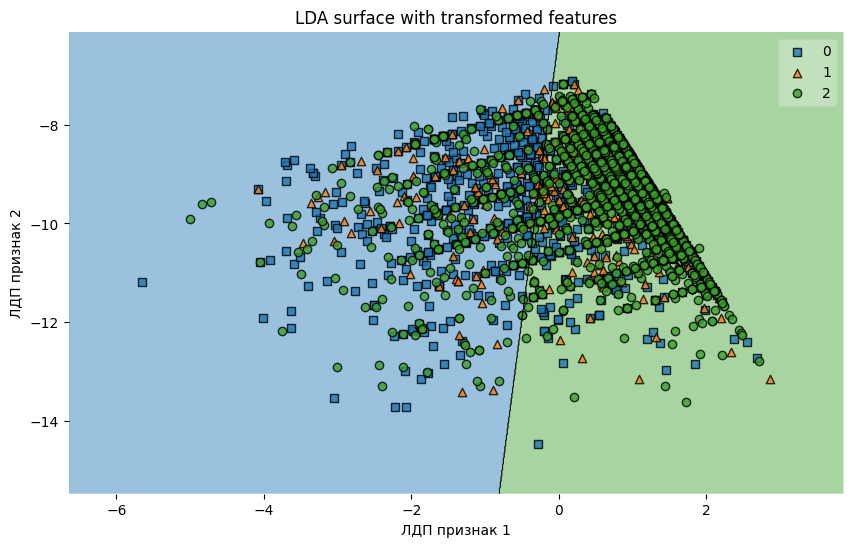

In [ ]:
# Выбор признаков для применения LDA
Xs = df[['Age at enrollment', 'Admission grade']]
ys = df['Target'].values

# Применение LDA
sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(Xs, ys).transform(Xs)

# Разделение на обучающую и тестовую выборки
X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

# Повторное обучение модели на обучающей выборке
sk_lda2.fit(X1_lda_train, y1_train)

# Визуализация решения
plt.figure(figsize=(10, 6))
plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)
plt.xlabel('ЛДП признак 1')
plt.ylabel('ЛДП признак 2')
plt.show()

In [ ]:
# Прогноз на тестовом наборе данных
lda_pred_res = lda.predict(X_test)

# Оценка метрик на тестовом наборе
accuracy = accuracy_score(y_test, lda_pred_res)  # Оценка точности классификации
recall = recall_score(y_test, lda_pred_res, average="weighted")  # Оценка recall
precision = precision_score(y_test, lda_pred_res, average="weighted")  # Оценка precision

# Вывод метрик
print(f"Точность (accuracy): {round(accuracy, 2)}")
print(f"Recall (все классы предсказаны верно): {round(recall, 2)}")
print(f"Precision (уверенность при предсказании классов): {round(precision, 2)}")

# Подробный отчет по классификации
print("Детализация:")
print(classification_report(y_test, lda_pred_res, target_names=[str(i) for i in np.unique(y_test)]))

Точность (accuracy): 0.77
Recall (все классы предсказаны верно): 0.77
Precision (уверенность при предсказании классов): 0.76
Детализация:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       284
           1       0.50      0.40      0.45       159
           2       0.78      0.95      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



## Пример 2

Датасет - https://drive.google.com/drive/folders/1PYU6pyHlkO2ajzl2QUEZAx655PVX-jF4?usp=drive_link

In [ ]:
import pandas as pd
from sklearn import preprocessing, model_selection, metrics, ensemble
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset2=pd.read_csv('/content/drive/MyDrive/datapy/cancer.csv', delimiter=';')

In [ ]:
dataset2.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

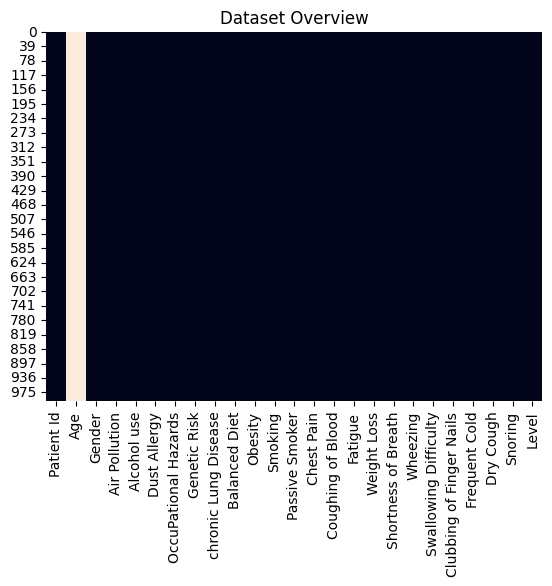

In [ ]:

# Определяет, является ли столбец числовым или категориальным
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

# Создаем словарь, где ключи — это названия фич, а значения — "cat" или "num"
dic_cols = {col: utils_recognize_type(dataset2, col, max_cat=20) for col in dataset2.columns}

# dtf.isnull() возвращает датафрейм с True для пропущенных значений и False для непустых
heatmap = dataset2.isnull()

# Меняем значения в heatmap
for k, v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)


# Строим тепловую карту
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()


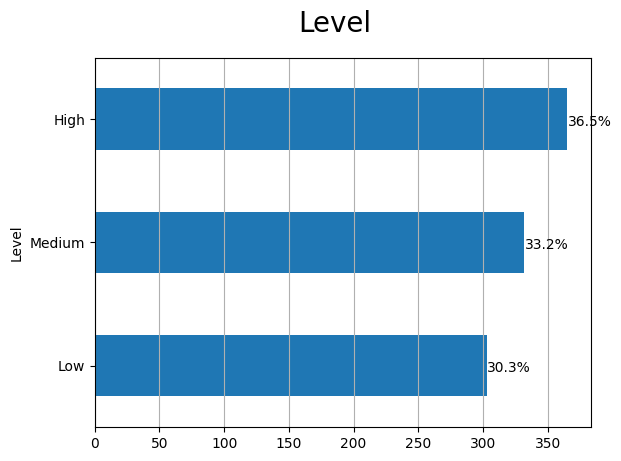

In [ ]:
# Анализируем количество объектов по целевой переменной (Level)
y = "Level"  # Целевая переменная в вашем датасете

# Группируем объекты по целевой переменной и строим barh график
ax = dataset2[y].value_counts().sort_values().plot(kind="barh")

# Формируем надписи для графика
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + .3, i.get_y() + .20,
            str(round((i.get_width() / total) * 100, 2)) + '%',
            fontsize=10, color='black')

ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

# Отображаем график
plt.show()


<ipython-input-10-c8c1c791d930>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # Гистограмма и KDE
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


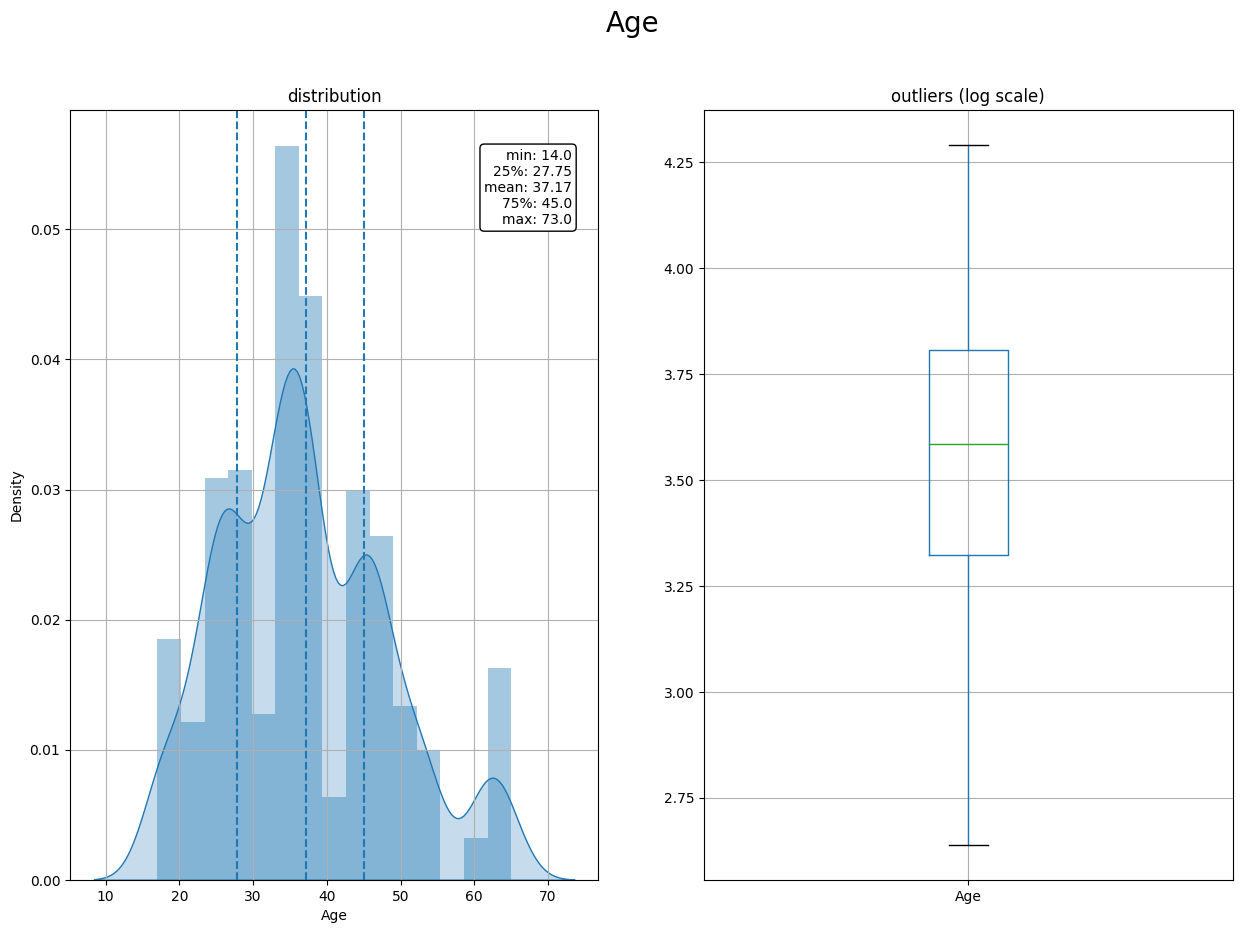

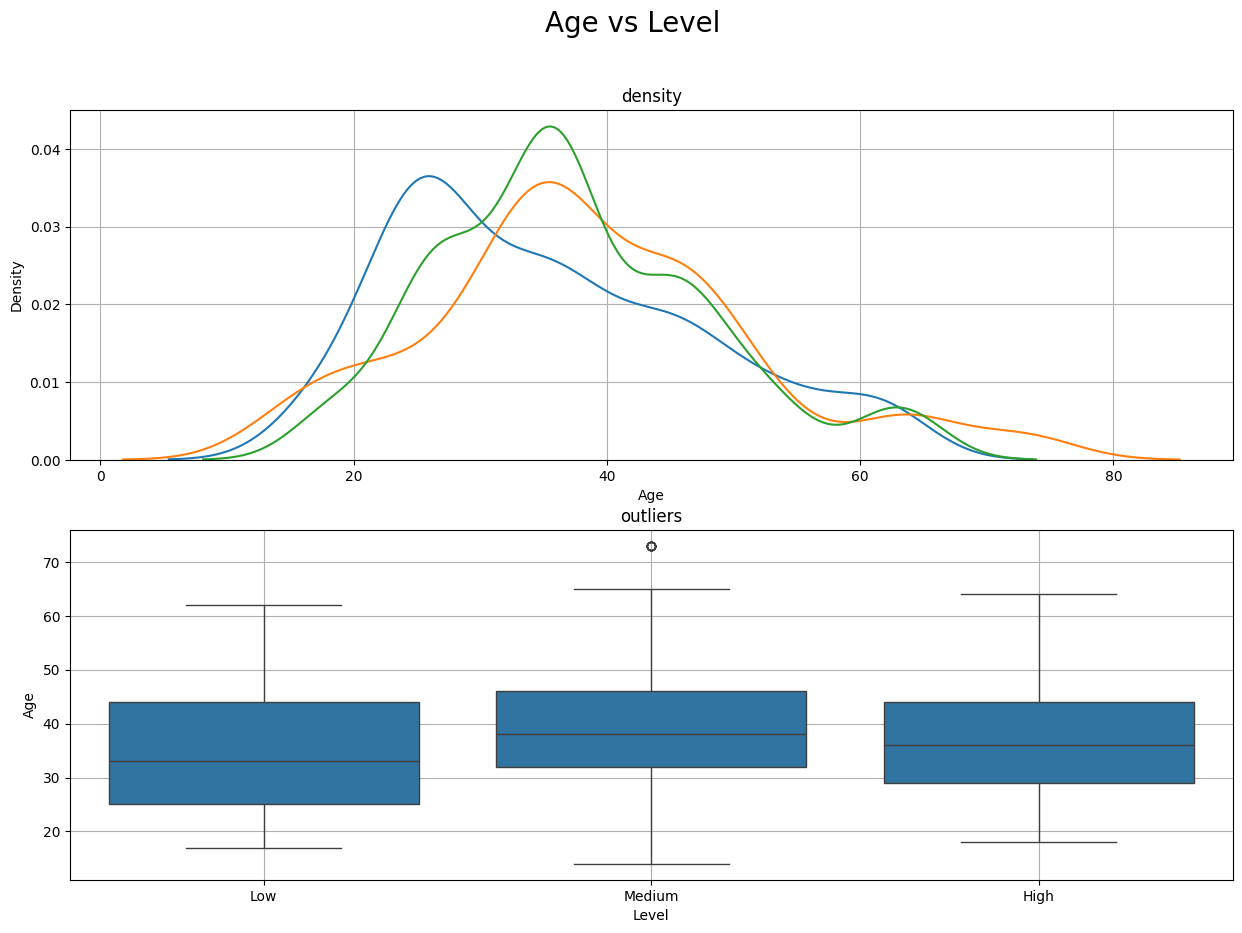

In [ ]:
# Функция для отображения распределения и выбросов
def show_dist(x, dtf):
    '''
    :param x: название столбца
    :param dtf: датасет
    :return: ничего не возвращает
    '''
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)

    ### Распределение
    ax[0].title.set_text('distribution')
    variable = dtf[x].fillna(dtf[x].mean())  # Заменяем отсутствующие значения средними
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[(variable > breaks[0]) & (variable < breaks[10])]
    sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])  # Гистограмма и KDE

    # Описание переменной
    des = dtf[x].describe()

    # Добавляем квантильные и средние линии
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)

    # Добавляем текст с описанием
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(
        ("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"], "75%: " + des["75%"], "max: " + des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right",
               bbox=dict(boxstyle='round', facecolor='white', alpha=1))

    ### Boxplot для выбросов
    ax[1].title.set_text('outliers (log scale)')
    tmp_dtf = pd.DataFrame(dtf[x])
    tmp_dtf[x] = np.log(tmp_dtf[x].replace(0, np.nan))  # Логарифмируем, избегая нулей
    tmp_dtf.boxplot(column=x, ax=ax[1])

    plt.show()

# Проверяем работу функции на переменной "Age"
show_dist('Age', dataset2)

# График плотности и блочная диаграмма для анализа переменных
cat, num = "Level", "Age"
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(num + " vs " + cat, fontsize=20)

### Плотность распределения
ax[0].title.set_text('density')
for i in dataset2[cat].unique():
    sns.kdeplot(dataset2[dataset2[cat] == i][num], label=i, ax=ax[0])  # Плотности для каждой категории Level
ax[0].grid(True)

### Boxplot для анализа выбросов
ax[1].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=dataset2, ax=ax[1])
ax[1].grid(True)

plt.show()


In [ ]:

# Подготовим структуру словаря из фрейма данных со столбцами
def prep(df):
    df['gender_ind'] = df['Gender'].apply(lambda x: 0 if x == 1 else 1)  # Преобразуем пол в числовые значения
    df.dropna(axis=0, how='any', inplace=True)  # Удалим строки с пропущенными значениями
    return df

# Разделение данных на обучающие и тестовые наборы
dtf_tr, dtf_t = model_selection.train_test_split(dataset2, test_size=0.3)

# Подготовим данные в трейне и тесте одинаково
dtf_train = prep(dtf_tr.copy())
dtf_test = prep(dtf_t.copy())

# Преобразование строковых значений в числовые
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
dtf_train["Level"] = dtf_train["Level"].map(level_mapping)
dtf_test["Level"] = dtf_test["Level"].map(level_mapping)

# Вывод информации
print("X_train shape:", dtf_train.drop("Level", axis=1).shape, "| X_test shape:", dtf_test.drop("Level", axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Level"]), 2), "| y_test mean:", round(np.mean(dtf_test["Level"]), 2))


X_train shape: (700, 25) | X_test shape: (300, 25)
y_train mean: 1.08 | y_test mean: 1.02


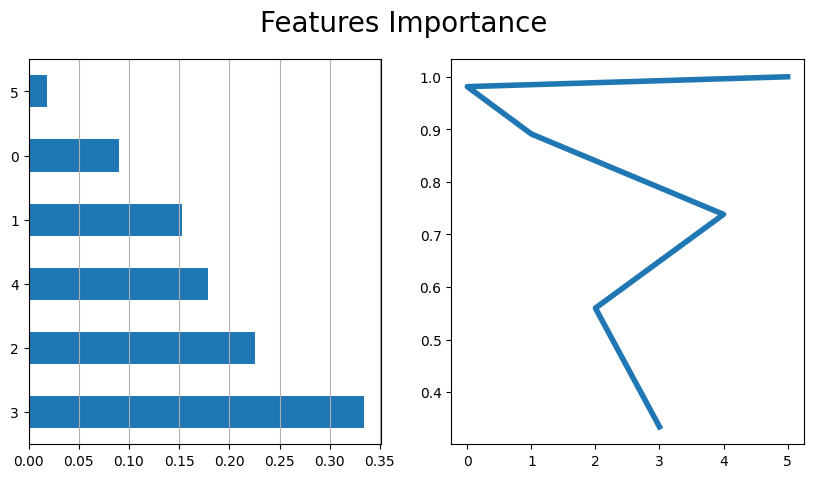

In [ ]:


# Формируем вспомогательные датасеты и Series с целевой переменной
train_x = dtf_train[['Age', 'Air Pollution', 'Alcohol use', 'Obesity', 'Smoking', 'gender_ind']]
train_y = dtf_train['Level']
test_x = dtf_test[['Age', 'Air Pollution', 'Alcohol use', 'Obesity', 'Smoking', 'gender_ind']]
test_y = dtf_test['Level']

# Нормируем значения
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns, index=train_x.index)
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns, index=test_x.index)

# Оцениваем важность фичей
X = train_x_scaled.values
y = train_y.values
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
model.fit(X, y)
importances = model.feature_importances_

# Визуализация важности фичей
dtf_importances = pd.DataFrame({"IMPORTANCE": importances, "VARIABLE": train_x_scaled.columns})
dtf_importances = dtf_importances.sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle("Features Importance", fontsize=20)
dtf_importances[["IMPORTANCE"]].plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
plt.show()



In [ ]:
# Проектирование модели
X_train = train_x_scaled
y_train = train_y
X_test = test_x_scaled
y_test = test_y

# Используем GradientBoostingClassifier для обучения
param_dic = {
    'learning_rate': [0.15, 0.1, 0.05],
    'n_estimators': [100, 250, 500],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [2, 3, 4],
    'subsample': [0.7, 0.8, 0.9, 1]
}
random_search = model_selection.RandomizedSearchCV(ensemble.GradientBoostingClassifier(), param_distributions=param_dic, n_iter=10, scoring="accuracy").fit(X_train, y_train)

# Лучшие параметры модели
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)



Best Model parameters: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 5, 'learning_rate': 0.05}
Best Model mean accuracy: 1.0


Accuracy: 1.0
AUC: 1.0


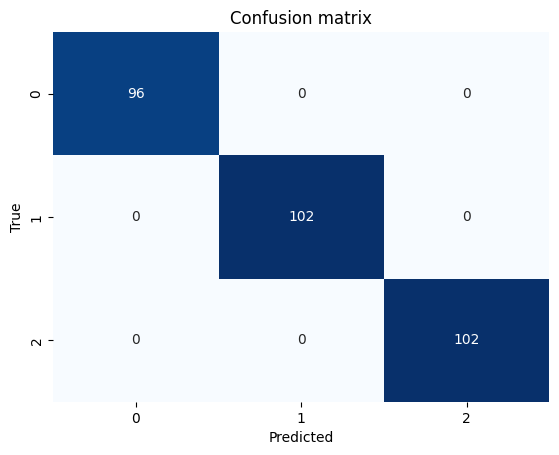

In [ ]:
# Обучаем модель с лучшими параметрами
model = random_search.best_estimator_
model.fit(X_train, y_train)

# Прогнозирование
predicted_prob = model.predict_proba(X_test)
predicted = model.predict(X_test).astype('int32')

# Оценка модели
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class='ovo', average="weighted")
print("Accuracy:", round(accuracy, 2))
print("AUC:", round(auc, 2))

# Confusion matrix
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Predicted", ylabel="True", title="Confusion matrix")
plt.show()
